In [15]:
import torch
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt

##### Please note: Since PyTorch 0.4.0, Variable was merged with Tensor, and its functionality is now directly available in torch.Tensor

In [16]:
torch.manual_seed(28)

In [17]:
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],[9.779], [6.182], [7.59], [2.167], [7.042],[10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],[3.366], [2.596], [2.53], [1.221], [2.827],     [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

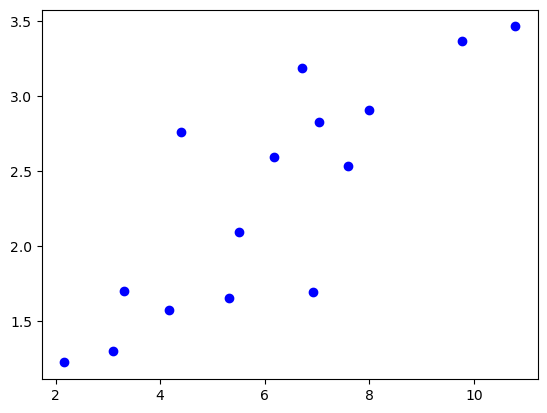

In [18]:
plt.plot(x_train, y_train, 'bo')

In [19]:
w = Variable(torch.randn(1), requires_grad=True)
b = Variable(torch.randn(1), requires_grad=True)
# Learning Rate
a = 0.002
# Construct a univariate linear regression model.
def linear_model(x):
    return x * w + b
# Convert the input data to Tensor then to Variable
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)
x_train = Variable(x_train)
y_train = Variable(y_train)

y = linear_model(x_train)

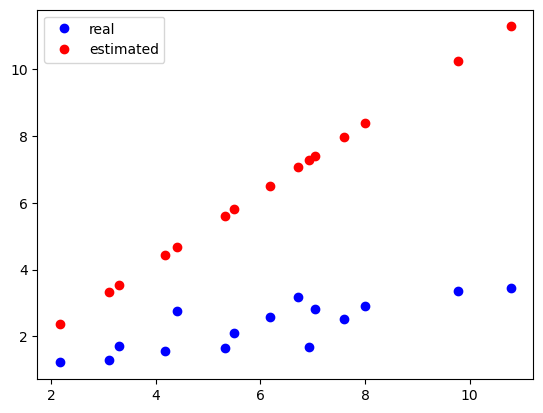

In [20]:
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'bo', label='real')
plt.plot(x_train.data.numpy(), y.data.numpy(), 'ro', label='estimated')
plt.legend()

In [21]:
def get_loss(y_, y):
    return torch.mean((y_ - y) ** 2)

In [22]:
loss = get_loss(y, y_train)
print(loss)
loss.backward()
print(w.grad)
print(b.grad)


tensor(20.0804, grad_fn=<MeanBackward0>)
tensor([57.9888])
tensor([8.1472])


In [23]:
# One round of params update.
w.data = w.data - a * w.grad.data
b.data = b.data - a * b.grad.data

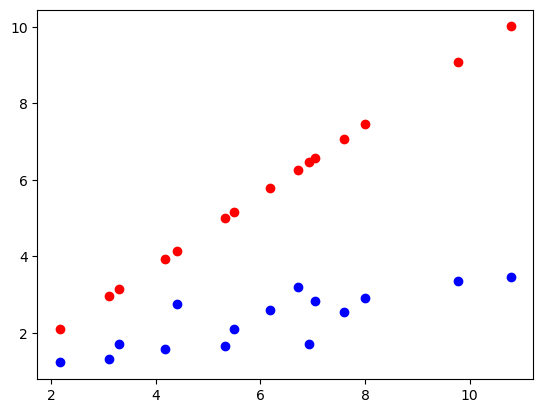

In [24]:
y = linear_model(x_train)
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'bo', label='real')
plt.plot(x_train.data.numpy(), y.data.numpy(), 'ro', label='estimated')

In [25]:
for i in range(30):
    y = linear_model(x_train)
    loss = get_loss(y, y_train)

    w.grad.zero_()
    b.grad.zero_()
    loss.backward()
    w.data = w.data - a * w.grad.data
    b.data = b.data - a * b.grad.data
    print(f"epoch: {i}, loss: {loss}")

epoch: 0, loss: 13.814743041992188
epoch: 1, loss: 9.527310371398926
epoch: 2, loss: 6.593511581420898
epoch: 3, loss: 4.585972785949707
epoch: 4, loss: 3.2122466564178467
epoch: 5, loss: 2.272221326828003
epoch: 6, loss: 1.6289665699005127
epoch: 7, loss: 1.1887835264205933
epoch: 8, loss: 0.8875569701194763
epoch: 9, loss: 0.6814146637916565
epoch: 10, loss: 0.5403355360031128
epoch: 11, loss: 0.4437776207923889
epoch: 12, loss: 0.3776843845844269
epoch: 13, loss: 0.3324373960494995
epoch: 14, loss: 0.30145493149757385
epoch: 15, loss: 0.28023311495780945
epoch: 16, loss: 0.26569056510925293
epoch: 17, loss: 0.2557182312011719
epoch: 18, loss: 0.24887330830097198
epoch: 19, loss: 0.2441684603691101
epoch: 20, loss: 0.24092791974544525
epoch: 21, loss: 0.23868943750858307
epoch: 22, loss: 0.2371366173028946
epoch: 23, loss: 0.23605303466320038
epoch: 24, loss: 0.23529063165187836
epoch: 25, loss: 0.23474791646003723
epoch: 26, loss: 0.2343555986881256
epoch: 27, loss: 0.23406614363193

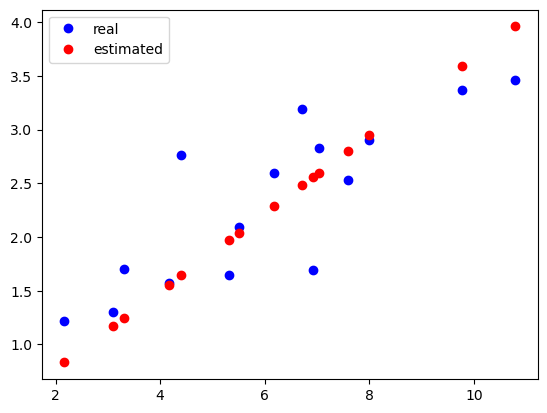

In [26]:
y = linear_model(x_train)
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'bo', label='real')
plt.plot(x_train.data.numpy(), y.data.numpy(), 'ro', label='estimated')
plt.legend()

#### How to utilize linear regression with Sklearn

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [29]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
raw_df = pd.read_csv(data_url, sep='\s+', header=None)
raw_df.columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS",                   "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
raw_df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [30]:
# Split the dataset.
data = raw_df.values[:, :13]
target = raw_df.values[:, 13]
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.5, random_state=1)

print(x_train.shape)
print(x_test.shape)

(253, 13)
(253, 13)


In [31]:
# Load the model.
lr = LinearRegression()
# Start training.
lr.fit(x_train, y_train)

print(lr.coef_)
print(lr.intercept_)


[-1.03895378e-01  6.56815411e-02 -9.88784599e-03  1.44988900e+00
 -1.72371494e+01  3.31332604e+00  1.08945012e-02 -1.37553794e+00
  3.23677422e-01 -1.20132483e-02 -8.20440741e-01  8.69013924e-03
 -5.28748376e-01]
36.050645844659186


### Model Evaluation
- Mean Absolute Error, MAE
- Mean Squared Error, MSE
- Root Mean Squared Error, RMSE

In [32]:
from sklearn import metrics # Import the evaluation toolkits of Sklearn.
y_pred = lr.predict(x_test)

MyScore = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("RMSE:", MyScore)

RMSE: 4.779046666296567


In [33]:
print("Default Measurement of Model Performance", lr.score(x_test, y_test))

Default Measurement of Model Performance 0.7397314185094672


#### Visualize the Difference between Real and Estimated Values

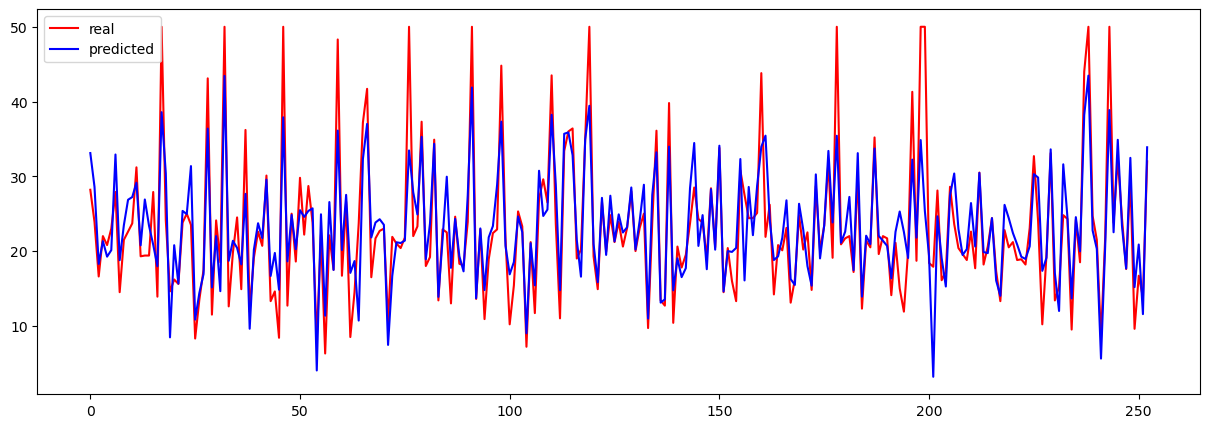

In [34]:
plt.figure(figsize=(15,5))
plt.plot(range(len(y_test)), y_test, 'r', label='real')
plt.plot(range(len(y_test)), y_pred, 'b', label='predicted')
plt.legend()

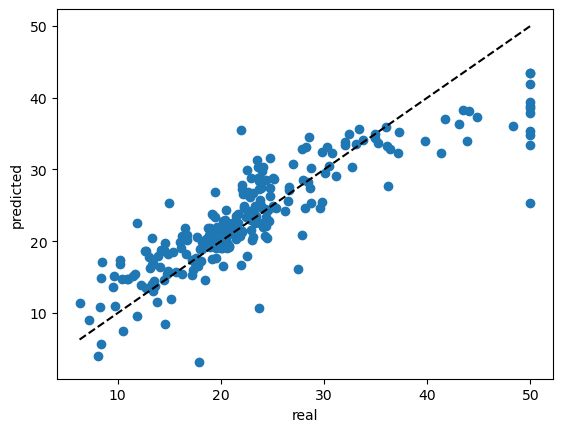

In [35]:
# Visualize the regression curve.
def plot_LR(y_test, y_pred):
    plt.figure()
    plt.scatter(y_test, y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
    plt.xlabel('real')
    plt.ylabel('predicted')
plot_LR(y_test, y_pred)

#### Linear model is sensitive to abnormal values

In [36]:
# Remove the outlier=50.
drop_index = raw_df[raw_df["MEDV"]==50].index.values
raw_df = raw_df.drop(drop_index)
data = raw_df.values[:, :13]
target = raw_df.values[:, 13]
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.5, random_state=12)


In [37]:
# Train the model on training set
lr = LinearRegression()
lr.fit(x_train, y_train)
# Predict the test set data
y_pred = lr.predict(x_test)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("RMSE:", RMSE)
print("LinearRegression Score", lr.score(x_test, y_test))

RMSE: 3.917831431733449
LinearRegression Score 0.7370030268777943


#### SGDRegressor

In [38]:
# Load the model.
lr = SGDRegressor(loss="squared_error", alpha=0.0001)
# Pass the training data to start training.
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("RMSE_SGD", RMSE)
print("Score:", lr.score(x_test, y_test))

RMSE_SGD 40911750372573.14
Score: -2.867843047843184e+25


Really bad performance, right?

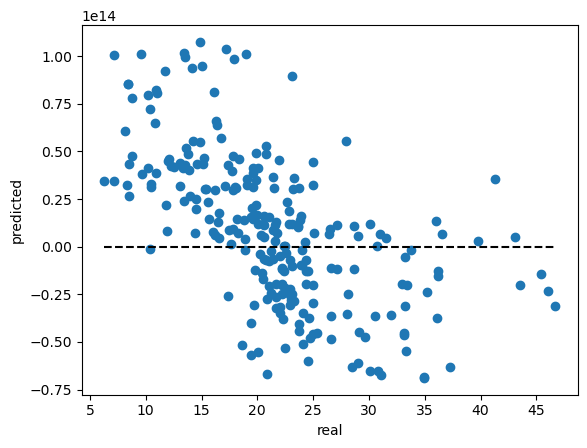

In [39]:
plot_LR(y_test, y_pred)

In [40]:
from sklearn.preprocessing import StandardScaler

ss_x = StandardScaler()
ss_y = StandardScaler()

In [41]:
x_train_s = ss_x.fit_transform(x_train)
x_test_s = ss_x.transform(x_test)

y_train_s = ss_y.fit_transform(y_train.reshape(-1, 1))
y_test_s = ss_y.transform(y_test.reshape(-1,1))

please not that should just use transform() for the test data, otherwise it will cause the data leakage. Which will inflate the performance of your model

- Different Scaling is different world
- Cannot properly add new values

In [42]:
lr = SGDRegressor(loss="squared_error", alpha=0.0001)
lr.fit(x_train_s, y_train_s)

y_pred_s = lr.predict(x_test_s)
RMSE = np.sqrt(metrics.mean_squared_error(y_test_s, y_pred_s))
print("RMSE:", RMSE)
print("SGDRegressor Score:", lr.score(x_test_s, y_test_s))

RMSE: 0.49011818319655914
SGDRegressor Score: 0.7324477832133829


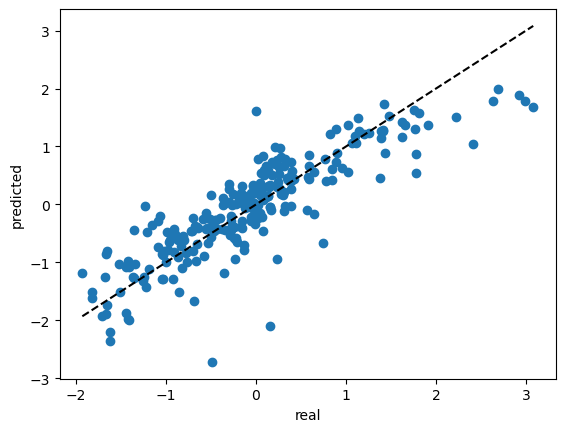

In [43]:
plot_LR(y_test_s, y_pred_s)

### Practice

#### <font color="blue">Q1</font>

In [44]:
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],[9.779], [6.182], [7.59], [2.167], [7.042],[10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],[3.366], [2.596], [2.53], [1.221], [2.827],     [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

In [45]:
def linear_model(x):
    return w * x + b

def get_loss(y_pred, label):
    return torch.mean((label - y_pred) ** 2)

x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)
x_train = Variable(x_train)
y_train = Variable(y_train)

learning_rates = [0.00002, 0.0002, 0.002, 0.01, 0.02, 0.023]
final_loss = []
for a in learning_rates:
    w = Variable(torch.randn(1), requires_grad = True)
    b = Variable(torch.zeros(1), requires_grad = True)
    for i in range(30):
        y = linear_model(x_train)
        loss = get_loss(y_train, y)
        loss.backward()
        w.data = w.data - a * w.grad.data
        b.data = b.data - a * b.grad.data
        w.grad.zero_()
        b.grad.zero_()
    loss = get_loss(y_train, linear_model(x_train))
    print(f"final_loss =", loss.data)
    final_loss.append(loss.item())


final_loss = tensor(5.0481)
final_loss = tensor(7.3632)
final_loss = tensor(0.2544)
final_loss = tensor(0.2428)
final_loss = tensor(0.2554)
final_loss = tensor(103.5388)


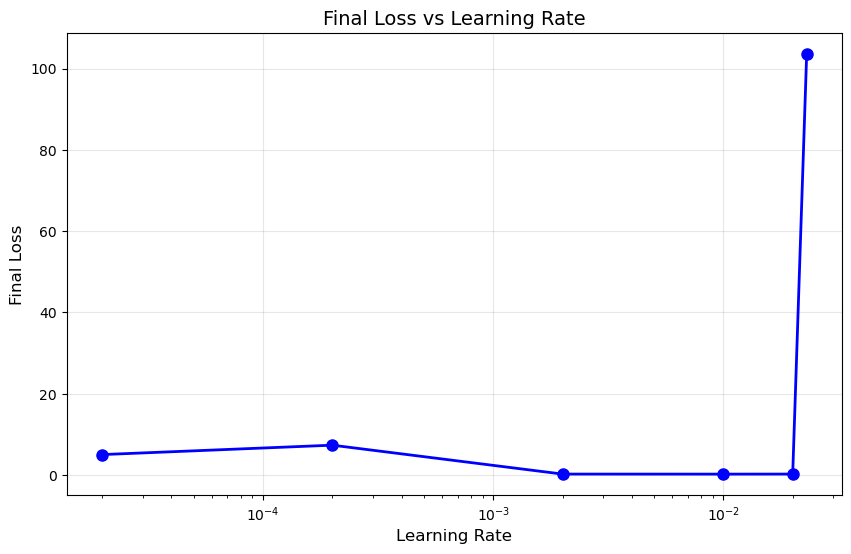

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, final_loss, 'bo-', linewidth=2, markersize=8)
plt.xscale('log')  # Use log scale for learning rates (common practice)
plt.xlabel('Learning Rate', fontsize=12)
plt.ylabel('Final Loss', fontsize=12)
plt.title('Final Loss vs Learning Rate', fontsize=14)
plt.grid(True, alpha=0.3)

### Summary of Learning Rate
- Too large
    1. Faster Converge.
    2. May jump over the optimum, but never settle.
    3. May fail to converge.
- Too small
    1. Takes a long time to converge, so it may not reach it with limited number of epochs.
    2. It may get stuck in a suboptimal local minimum.
    3. Potiential Underfitting.

#### <font color="blue">Q2</font>

In [47]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
raw_df = pd.read_csv(data_url, sep='\s+', header=None)
raw_df.columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS","RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
raw_df.head(5)
data = raw_df.values[:, :13]
target = raw_df.values[:, 13]
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.5, random_state=1)

In [48]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
MyScore1 = metrics.mean_absolute_error(y_test, y_pred)
MyScore2 = metrics.mean_squared_error(y_test, y_pred)
print(MyScore1)
print(MyScore2)


3.337426309109129
22.839287038640336


#### <font color="blue">Q3</font>

Choose the **California Housing Dataset**, which is already normalized.

In [49]:
from sklearn.datasets import fetch_california_housing

In [50]:
california_housing = fetch_california_housing()
print(dir(california_housing))
print("data:")
print(california_housing.data)
print("-----------------------------------------------------------------------")
print("target:")
print(california_housing.target)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']
data:
[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]
-----------------------------------------------------------------------
target:
[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [ ]:
# Divide the dataset into training set and test set.
x_train, x_test, y_train, y_test = train_test_split(california_housing.data, california_housing.target, test_size=0.25, random_state=13)

#### **Least Square Method**

In [52]:
lr1 = LinearRegression()
lr1.fit(x_train, y_train)
print("Coefficient:")
print(" ")
print(lr1.coef_)
print("")
print("Interception:", lr1.intercept_)

Coefficient:
 
[ 4.34086794e-01  9.22620407e-03 -1.07716727e-01  6.49795121e-01
 -6.45193840e-06 -3.26941048e-03 -4.24620072e-01 -4.36568835e-01]

Interception: -37.05331550086231


The RMSE of Least Square Method = 0.7322330017220682


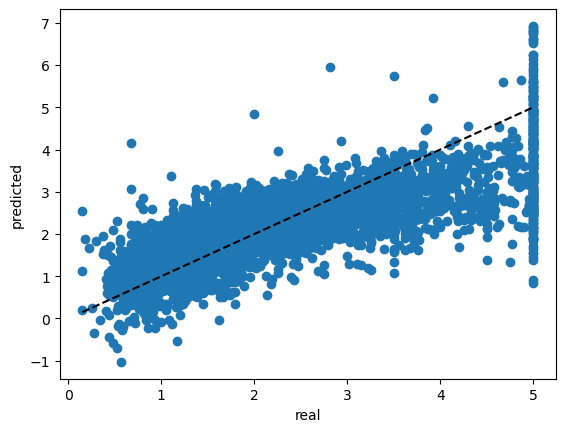

In [53]:
y1_pred = lr1.predict(x_test)
Score1 = np.sqrt(metrics.mean_squared_error(y_test, y1_pred))
print("The RMSE of Least Square Method =", Score1)
plot_LR(y_test, y1_pred)

#### SGD

The RMSE of Stochastic Gradient Descent = 0.7329122392097127


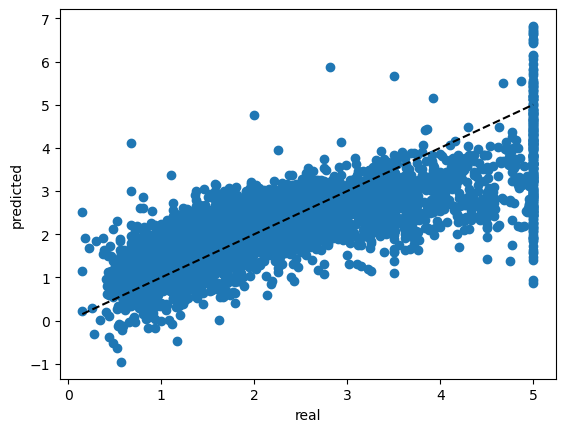

In [69]:
# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform both training and test data
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)  # Important: use transform, not fit_transform

lr2 = SGDRegressor()
lr2.fit(x_train, y_train)
y2_pred = lr2.predict(x_test)
Score1 = np.sqrt(metrics.mean_squared_error(y_test, y2_pred))
print("The RMSE of Stochastic Gradient Descent =", Score1)
plot_LR(y_test, y2_pred)

### Gradient Descent

#### Batch Gradient Descent

In [55]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
X_b = np.c_[np.ones((100, 1)), X]
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]

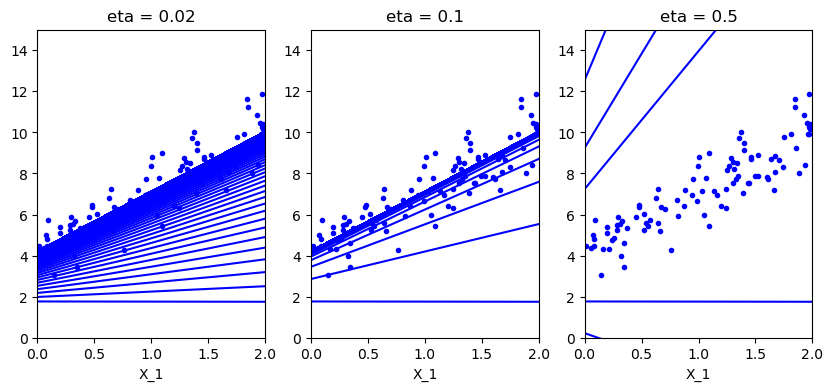

In [56]:
eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)
for iteration in range(n_iterations):
    gradients = 2/m* X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta*gradients


theta_path_bgd = []
def plot_gradient_descent(theta,eta,theta_path = None):
    m = len(X_b)
    plt.plot(X,y,'b.')
    n_iterations = 1000
    for iteration in range(n_iterations):
        y_predict = X_new_b.dot(theta)
        plt.plot(X_new,y_predict,'b-')
        gradients = 2/m* X_b.T.dot(X_b.dot(theta)-y)
        theta = theta - eta*gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel('X_1')
    plt.axis([0,2,0,15])
    plt.title('eta = {}'.format(eta))


theta = np.random.randn(2,1)
plt.figure(figsize=(10,4))
plt.subplot(131)
plot_gradient_descent(theta,eta = 0.02)
plt.subplot(132)
plot_gradient_descent(theta,eta = 0.1,theta_path=theta_path_bgd)
plt.subplot(133)
plot_gradient_descent(theta,eta = 0.5)
plt.show()


#### SGD

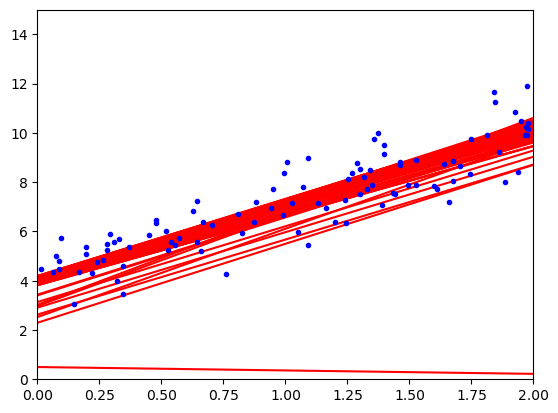

In [57]:
theta_path_sgd=[]
m = len(X_b)
np.random.seed(42)
n_epochs = 50
t0 = 5
t1 = 50
def learning_schedule(t):
    return t0/(t1+t)
theta = np.random.randn(2,1)
for epoch in range(n_epochs):
    for i in range(m):
        if epoch < 10 and i<10:
            y_predict = X_new_b.dot(theta)
            plt.plot(X_new,y_predict,'r-')
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2* xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch*m+i)
        theta = theta-eta*gradients
        theta_path_sgd.append(theta)
        
plt.plot(X,y,'b.')
plt.axis([0,2,0,15])   
plt.show()

#### MGD

(0.0, 2.0, 0.0, 15.0)

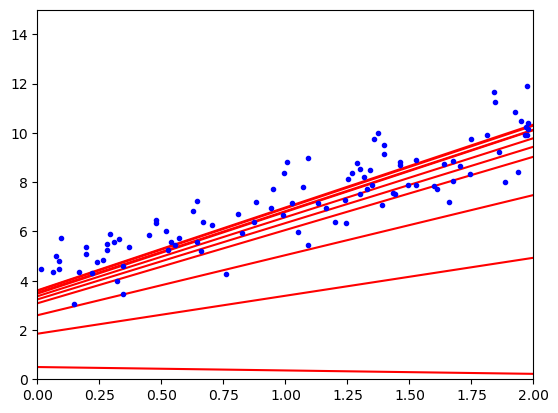

In [58]:
# Mini-batch Gradient Descent (MGD) based on your SGD setup

theta_path_mgd = []
m = len(X_b)

np.random.seed(42)
n_epochs = 50
t0 = 5
t1 = 50

def learning_schedule(t):
    return t0 / (t1 + t)

# choose a batch size (tweak as you like)
batch_size = 20
n_batches = int(np.ceil(m / batch_size))

theta = np.random.randn(2, 1)

step = 0  # global step counter for the learning schedule & early plotting
for epoch in range(n_epochs):
    # shuffle indices each epoch
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]

    for batch_idx in range(n_batches):
        start = batch_idx * batch_size
        end = min(start + batch_size, m)

        Xi = X_b_shuffled[start:end]
        yi = y_shuffled[start:end]

        # Early visualization (similar to your SGD: first ~10 steps)
        if step < 10:
            y_predict = X_new_b.dot(theta)
            plt.plot(X_new, y_predict, 'r-')

        # Gradient over the mini-batch
        gradients = (2 / (end - start)) * Xi.T.dot(Xi.dot(theta) - yi)

        # Learning rate and parameter update
        eta = learning_schedule(step)
        theta = theta - eta * gradients

        theta_path_mgd.append(theta.copy())
        step += 1

# Final scatter and axes styling to match your code
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])


#### Compare the three strategy

In [59]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

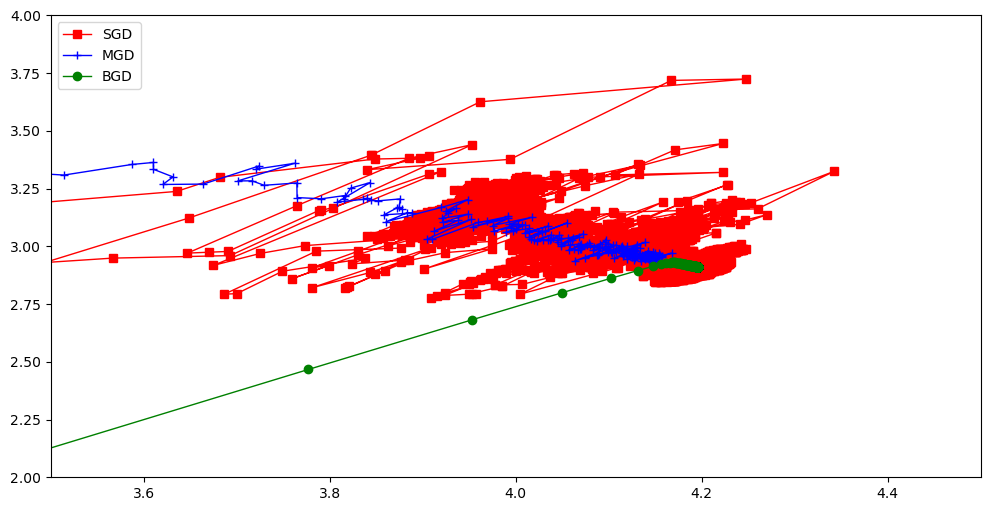

In [60]:
plt.figure(figsize=(12, 6))
plt.plot(theta_path_sgd[:,0], theta_path_sgd[:,1], 'r-s', linewidth=1, label="SGD")
plt.plot(theta_path_mgd[:,0], theta_path_mgd[:,1], 'b-+', linewidth=1, label="MGD")
plt.plot(theta_path_bgd[:,0], theta_path_bgd[:,1], 'g-o', linewidth=1, label="BGD")
plt.legend(loc="upper left")
plt.axis([3.5, 4.5, 2.0, 4.0])
plt.show()

### Polynomial Regression

In [61]:
# Dataset Generation.
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + np.random.randn(m, 1)

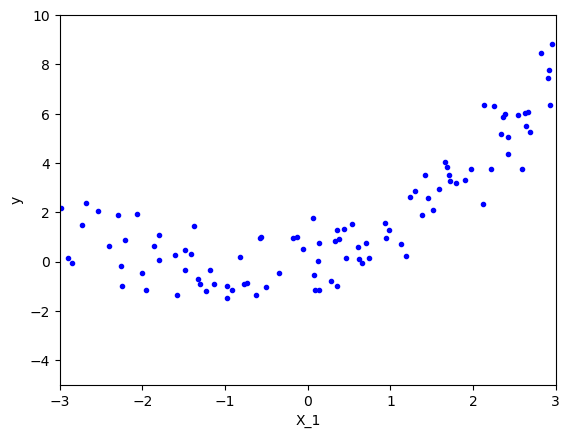

In [62]:
plt.plot(X, y, 'b.')
plt.xlabel('X_1')
plt.ylabel('y')
plt.axis([-3, 3, -5, 10])
plt.show()

In [63]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X)

In [64]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print(lin_reg.coef_)
print(lin_reg.intercept_)

[[0.95038538 0.52577032]]
[-0.0264767]


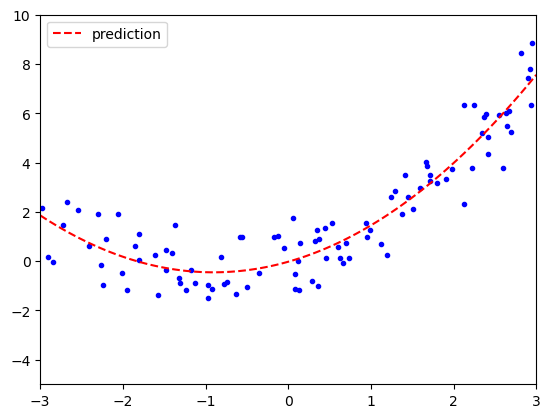

In [65]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, 'b.')
plt.plot(X_new, y_new, 'r--', label = "prediction")
plt.axis([-3, 3, -5, 10])
plt.legend()
plt.show()

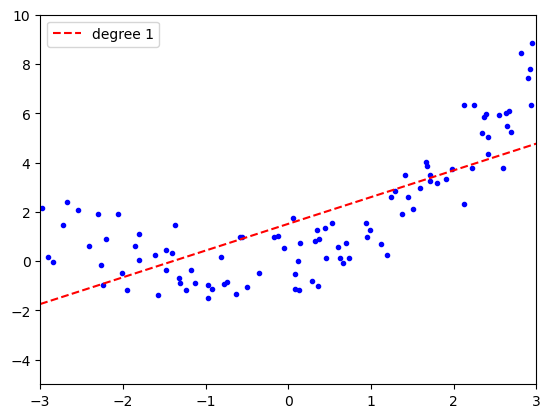

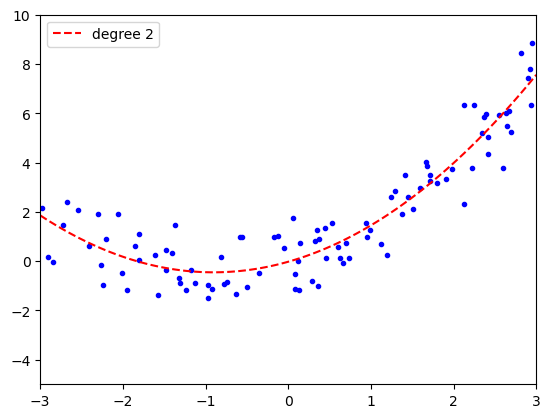

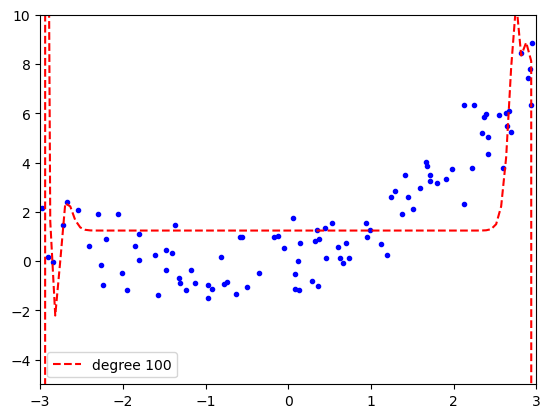

In [66]:
for n in [1, 2, 100]:
    poly_features = PolynomialFeatures(degree = n, include_bias = False)
    X_poly = poly_features.fit_transform(X)
    linreg = LinearRegression()
    linreg.fit(X_poly, y)
    X_new = np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly_features.transform(X_new)
    y_new = linreg.predict(X_new_poly)
    plt.plot(X, y, 'b.')
    plt.plot(X_new, y_new, 'r--', label = f"degree {n}")
    plt.axis([-3, 3, -5, 10])
    plt.legend()
    plt.show()

#### Plot learning curve

In [67]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curve(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 100)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict[:m]))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth = 2, label = 'train_error')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth = 3, label = 'val_error')
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")
    plt.legend()

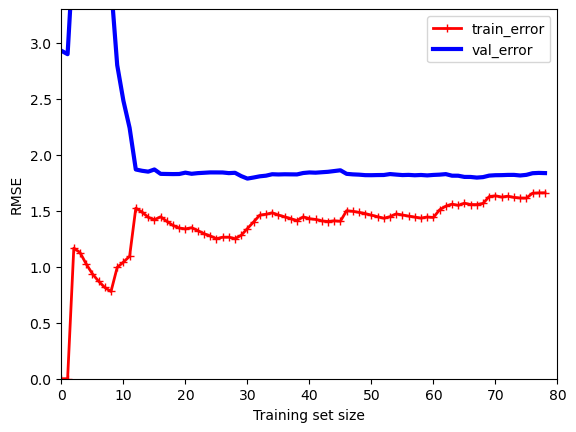

In [68]:
linreg = LinearRegression()
plot_learning_curve(linreg, X, y)
plt.axis([0, 80, 0, 3.3])
plt.show()

过拟合标志：
* 验证集误差远大于训练集误差
* 训练集误差收敛而验证集误差较大且不收敛